# Predicitive maintanance model

Made by: Joey Einerhand, Cédric Cortenraede, Lennox Narinx, Giuseppe Collura

## Get file
All files from the data directory will be loaded, _*this can take some time_\
based on the loaded data a dataframe will be created


In [43]:
import pandas as pd
import os

# Update "data_dir" location if necessary
data_dir = "data"
files = os.listdir(data_dir)
files = [file for file in files if file != "documentation.txt" and file != 'description.txt' and file != 'profile.txt']

In [59]:
df = pd.DataFrame()

# Load the sensor data
# Takes the mean of each row to illuminate different frequencies
for i in range(len(files)):
    df[files[i].strip(".txt")] = pd.read_csv(os.path.join(data_dir, files[i]), sep="\t", header=None, names=[files[i]]).mean(axis=1).to_numpy()

# Load the profiles
profiles = ["Cooler condition", "Valve condition", "Internal pump leakage", "Hydraulic accumulator", "Stable flag"]
for i in range(len(profiles)):
    df[profiles[i]] = pd.read_csv(os.path.join(data_dir,'profile.txt'), sep="\t", header=None)[i].to_numpy()

df

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,...,TS1,TS2,TS3,TS4,VS1,Cooler condition,Valve condition,Internal pump leakage,Hydraulic accumulator,Stable flag
0,28.866,1.383,2409.6,8.036,10.373,151.19,125.10,2.211,0.000,9.722,...,36.152,41.250,38.594,33.555,0.543,3,100,0,130,1
1,23.588,1.164,2397.8,7.890,10.391,150.86,125.04,2.219,0.000,9.623,...,37.477,42.105,39.250,35.121,0.534,3,100,0,130,1
2,21.519,1.103,2383.8,7.952,10.356,150.62,124.88,2.266,0.000,9.521,...,38.621,43.035,40.043,36.121,0.534,3,100,0,130,1
3,20.403,1.091,2372.0,7.773,10.261,150.28,124.59,2.273,0.000,9.420,...,39.461,43.988,40.922,36.988,0.542,3,100,0,130,1
4,20.016,1.106,2369.6,7.825,10.216,150.19,124.51,2.297,0.000,9.333,...,40.391,44.871,41.758,37.754,0.537,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,46.382,2.142,2415.6,7.874,10.171,151.86,125.73,2.273,10.207,9.979,...,35.414,40.922,38.187,30.379,0.527,100,100,0,90,0
2201,46.729,2.134,2413.6,7.787,10.174,151.78,125.44,2.406,10.193,9.953,...,35.398,40.891,38.195,30.375,0.544,100,100,0,90,0
2202,46.502,2.144,2413.6,7.685,10.171,151.83,125.94,2.250,10.246,9.998,...,35.437,40.898,38.160,30.379,0.517,100,100,0,90,0
2203,46.570,2.148,2415.6,7.793,10.189,151.78,125.91,2.281,10.189,9.953,...,35.441,40.898,38.176,30.375,0.528,100,100,0,90,0


## Analyse data
- The analysis looks at the correlation of the different columns in comparison to each other\
- This gives a filter to use later\
- The filter will be used to determine the columns impacting for the result

<AxesSubplot:>

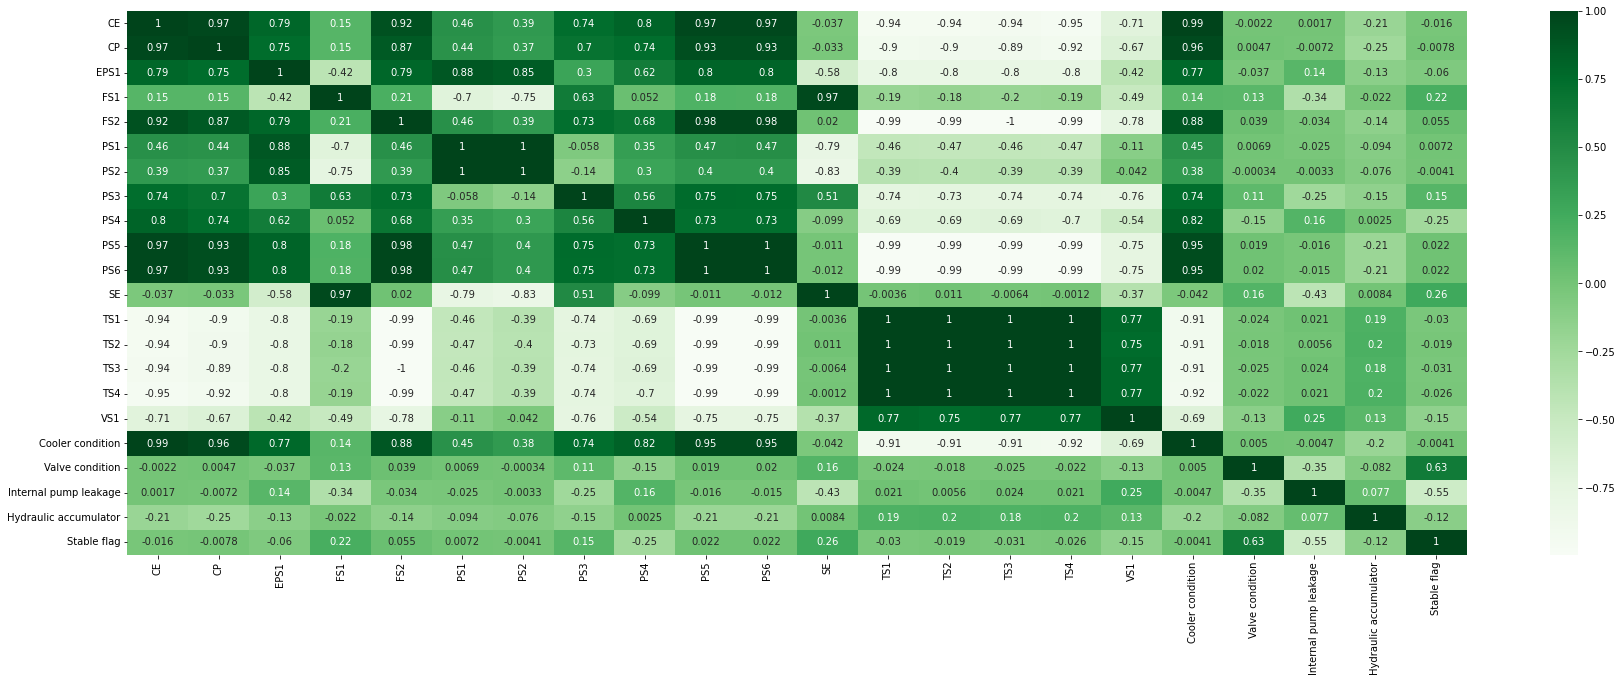

In [93]:
import seaborn as sb
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(30, 10))
sb.heatmap(corr, cmap="Greens", annot=True)

## Making model